# Breast Cancer Dataset

---



### Valencia Melita Christy - 0706022210007

- id: Unique identifier for each patient.
- diagnosis: The type of cancer diagnosis:
    - M = Malignant (cancerous)
    - B = Benign (non-cancerous)

- Mean, Standard Error, and Worst Columns for Each Feature:
Each feature has three measurements:
    - mean (average value),
    - se (standard error),
    - worst (the largest value observed).
- Cell Nucleus Features:
    - radius: Mean distance from the center to points on the cell's perimeter
    - texture: Standard deviation of gray-scale values, indicating variation in texture.
    - perimeter: Perimeter length of the cell nucleus.
    - area: The area enclosed by the cell nucleus.
    - smoothness: Variation in the radius lengths across the cell's contour.
    - compactness: Describes how closely packed the cell is, calculated as
(
perimeter
2
/
area
)
−
1
(perimeter
2
 /area)−1.
- concavity: The severity of concave portions in the cell contour.
- concave points: Number of concave points on the cell contour.
- symmetry: Symmetry of the cell nucleus.
- fractal_dimension: Measures the complexity of the cell boundary, computed as “coastline approximation” of cell perimeter.
Each of these features is then represented by three columns:

- Feature_mean (e.g., radius_mean): Average measurement of the feature.
- Feature_se (e.g., radius_se): Standard error of the feature’s measurement.
- Feature_worst (e.g., radius_worst): Worst (highest) measurement observed for the feature.


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/breast-cancer.csv')
pd.set_option('display.max_columns', None)
df.sample(10) # Mencetak 10 random sample

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,0.1800,0.05770,0.8361,1.4810,5.8200,128.70,0.004631,0.025370,0.031090,0.012410,0.01575,0.002747,33.120,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082
478,911685,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,0.2034,1.1660,1.5670,14.34,0.004957,0.021140,0.041560,0.008038,0.01843,0.003614,12.400,21.90,82.04,467.6,0.1352,0.20100,0.25960,0.07431,0.2941,0.09180
502,91505,B,12.540,16.32,81.25,476.3,0.11580,0.10850,0.059280,0.032790,0.1943,0.06612,0.2577,1.0950,1.5660,18.49,0.009702,0.015670,0.025750,0.011610,0.02801,0.002480,13.570,21.40,86.67,552.0,0.1580,0.17510,0.18890,0.08411,0.3155,0.07538
255,886452,M,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,0.4250,0.8098,2.5630,35.74,0.006351,0.026790,0.031190,0.013420,0.02062,0.002695,16.390,22.07,108.10,826.0,0.1512,0.32620,0.32090,0.13740,0.3068,0.07957
482,912519,B,13.470,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,0.06639,0.1588,0.5733,1.1020,12.84,0.004450,0.014520,0.013340,0.008791,0.01698,0.002787,14.830,18.32,94.94,660.2,0.1393,0.24990,0.18480,0.13350,0.3227,0.09326
334,897374,B,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.1840,1.5320,1.1990,13.24,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.350,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
205,879523,M,15.120,16.68,98.78,716.6,0.08876,0.09588,0.075500,0.040790,0.1594,0.05986,0.2711,0.3621,1.9740,26.44,0.005472,0.019190,0.020390,0.008260,0.01523,0.002881,17.770,20.24,117.70,989.5,0.1491,0.33310,0.33270,0.12520,0.3415,0.09740
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,0.3013,1.8790,2.1210,17.86,0.010940,0.018340,0.039960,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
506,91544001,B,12.220,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.021660,0.2124,0.06894,0.1811,0.7959,0.9857,12.58,0.006272,0.021980,0.039660,0.009894,0.01320,0.003813,13.160,24.17,85.13,515.3,0.1402,0.23150,0.35350,0.08088,0.2709,0.08839
39,855138,M,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,0.2130,0.5914,1.5450,18.52,0.005367,0.022390,0.030490,0.012620,0.01377,0.003187,15.530,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Informasi yang ditampilkan oleh `df.info()` memberikan gambaran umum mengenai dataset yang terdiri dari 569 entri dan 32 kolom. Dataset ini berisi informasi tentang berbagai fitur terkait kanker payudara, dengan satu kolom kategori, yaitu `diagnosis`, yang menunjukkan apakah tumor bersifat jinak atau ganas. Terdapat 30 kolom bertipe `float64`, yang mencakup berbagai pengukuran seperti `radius_mean`, `texture_mean`, dan `area_mean`, serta kolom bertipe `int64` untuk `id`. Semua kolom memiliki jumlah entri yang sama, yaitu 569, dan tidak terdapat nilai yang hilang (non-null). Dengan penggunaan memori sekitar 142.4 KB, dataset ini terstruktur dengan baik dan siap untuk analisis lebih lanjut.

In [ ]:
df.describe()
# melihat statistik deskriptif dari dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Hasil dari `df.describe()` memberikan ringkasan statistik untuk kolom-kolom numerik dalam dataset, yang mencakup 30 fitur bertipe `float64`. Ringkasan ini mencakup statistik penting seperti jumlah (`count`), rata-rata (`mean`), deviasi standar (`std`), nilai minimum (`min`), serta kuartil pertama (25%), median (50%), dan kuartil ketiga (75%). Misalnya, rata-rata `radius_mean` adalah sekitar 14.13 dengan deviasi standar 3.52, menunjukkan variasi dalam ukuran radius tumor. Nilai minimum dan maksimum untuk `area_mean` adalah 41.0 dan 1980.0, masing-masing, menandakan adanya rentang ukuran area yang luas di antara tumor. Dengan demikian, `df.describe()` memberikan gambaran yang komprehensif tentang distribusi dan karakteristik data numerik yang ada dalam dataset kanker payudara ini, yang dapat membantu dalam analisis lebih lanjut dan pengambilan keputusan.

In [ ]:
df.isnull().sum() # Memeriksa adanya null atau tidak. Tidak ada null dalam dataset

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.shape # Melihat ukuran dataset. Ada 569 baris dan 32 kolom

(569, 32)

In [ ]:
df['diagnosis'].unique().tolist() # Melihat isi unique value dari suatu kolom

['M', 'B']

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head() # Mengubah nilai M menjadi 1 dan B menjadi 0 agar menjadi data numerikal

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


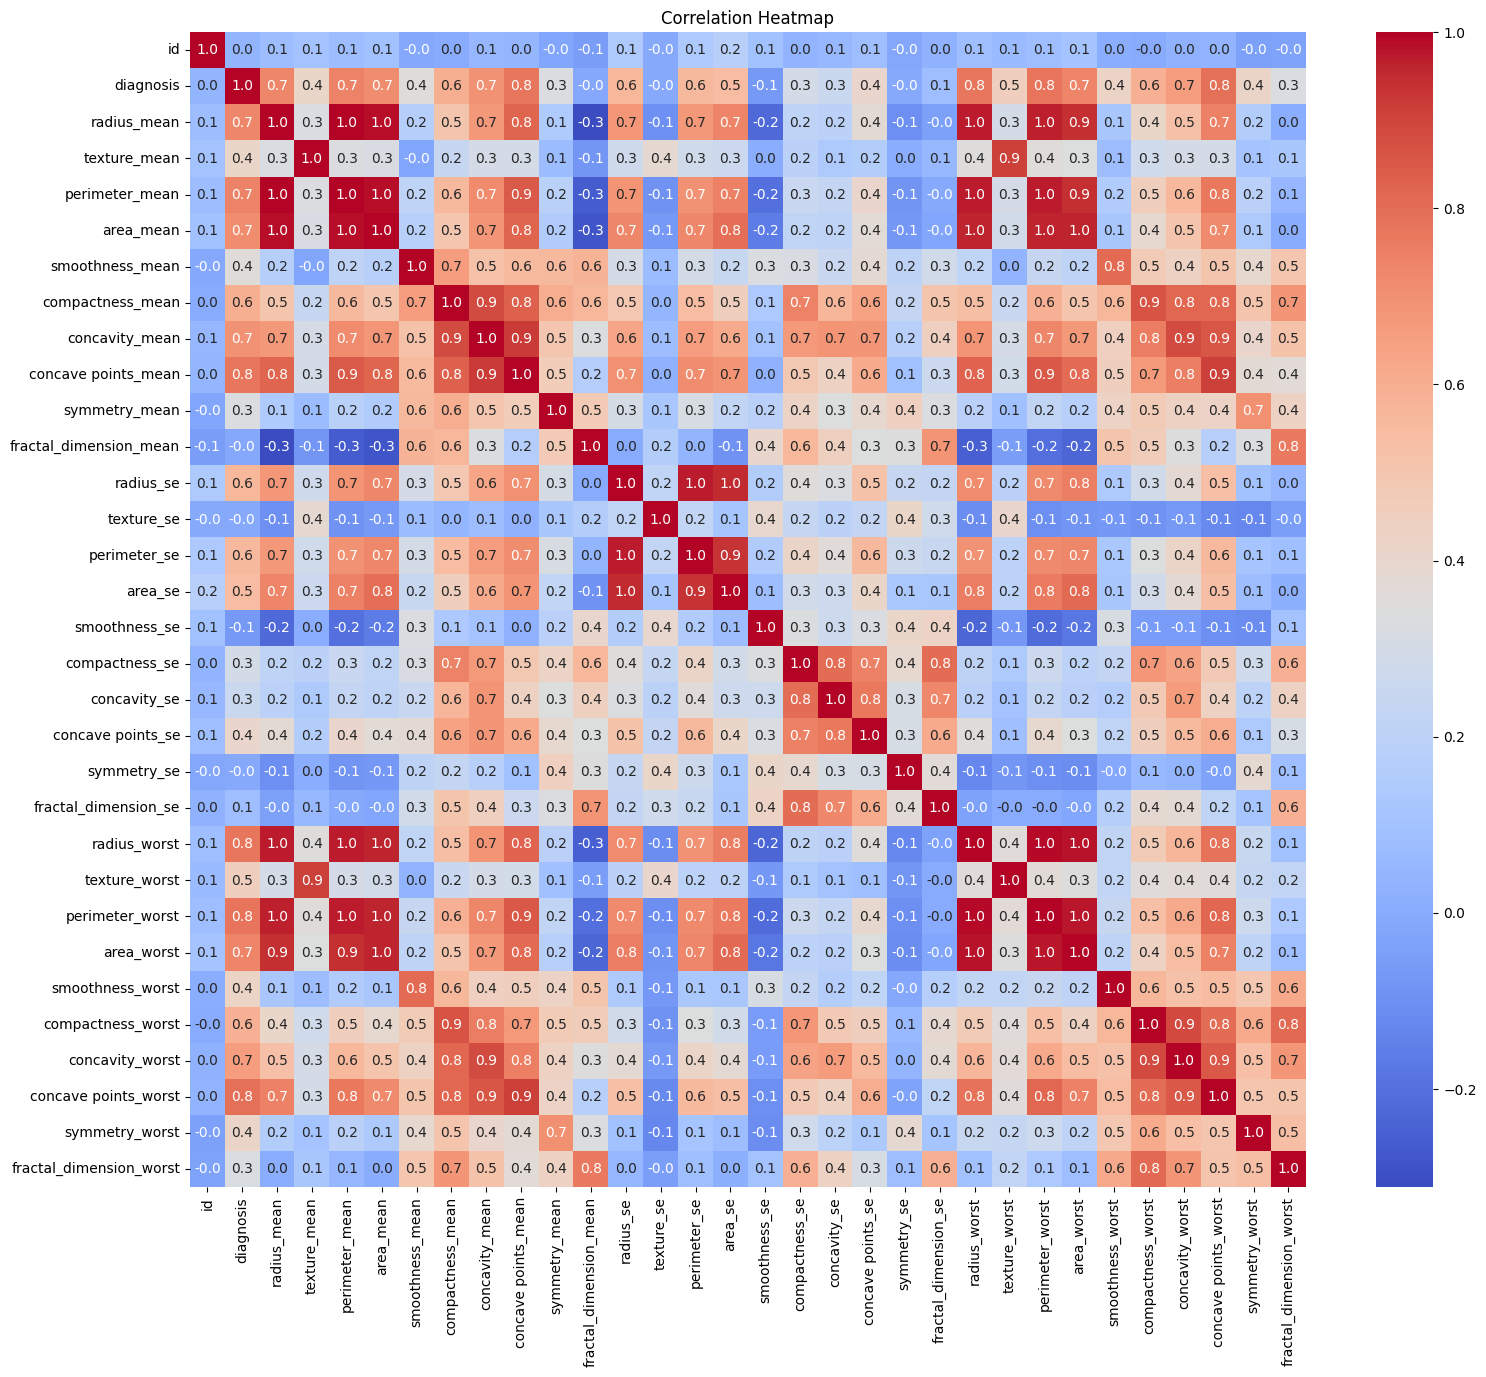

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show() # Melihat korelasi antar variabel

Heatmap ini menunjukkan hubungan antara fitur-fitur yang diukur pada dataset kanker payudara, memberikan gambaran tentang seberapa kuat dan arah hubungan antarvariabel. Setiap nilai dalam heatmap berkisar dari -1 hingga 1, di mana nilai mendekati 1 menunjukkan korelasi positif yang kuat, dan nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, fitur seperti `radius_mean`, `perimeter_mean`, dan `area_mean` memiliki korelasi yang sangat tinggi, mendekati nilai 1, yang berarti bahwa ketika radius tumor meningkat, perimeter dan area cenderung meningkat juga. Hubungan kuat ini dapat diartikan bahwa fitur-fitur ini saling terkait secara alami karena perubahan ukuran tumor. Di sisi lain, fitur seperti `texture_mean` memiliki korelasi yang lebih rendah dengan fitur-fitur lain, yang menunjukkan bahwa sifat tekstur tumor mungkin tidak selalu berbanding lurus dengan ukuran atau bentuknya.

Selain itu, kita juga dapat melihat beberapa korelasi yang signifikan dengan kolom `diagnosis`, yang menunjukkan adanya hubungan antara beberapa fitur dan kemungkinan diagnosis kanker ganas atau jinak. Sebagai contoh, fitur seperti `concave points_mean`, `concavity_mean`, dan `compactness_mean` menunjukkan korelasi positif dengan `diagnosis`, yang berarti nilai lebih tinggi pada fitur-fitur ini seringkali terkait dengan diagnosa tumor yang ganas. Sebaliknya, beberapa fitur seperti `smoothness_mean` memiliki korelasi yang lebih rendah dengan diagnosis, yang menunjukkan bahwa fitur ini mungkin kurang relevan dalam menentukan jenis tumor secara langsung. Analisis ini memberikan wawasan awal mengenai fitur-fitur yang lebih berpengaruh dalam model prediksi diagnosis, yang dapat digunakan untuk membangun model machine learning dengan memilih fitur yang paling berkaitan secara kuat dengan diagnosis kanker payudara.

<ipython-input-10-5a5537cc431a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='viridis')


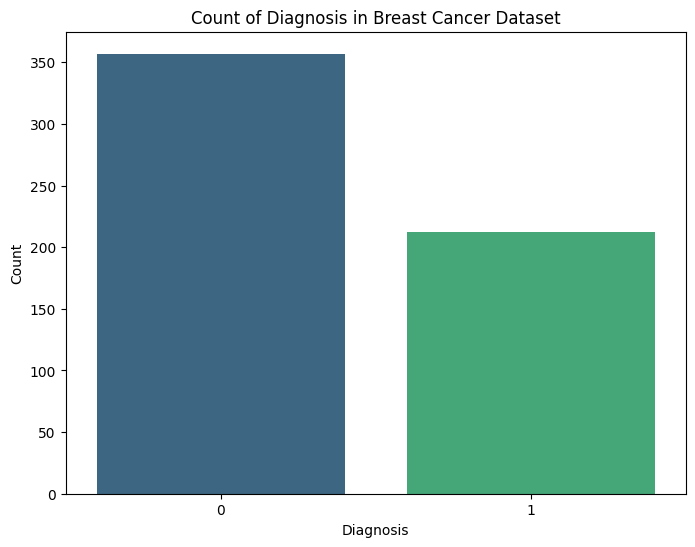

In [ ]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Diagnosis in Breast Cancer Dataset')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Dari dataset bisa dilihat bahwa yang mengidap Malignant lebih sedikit daripada Benign

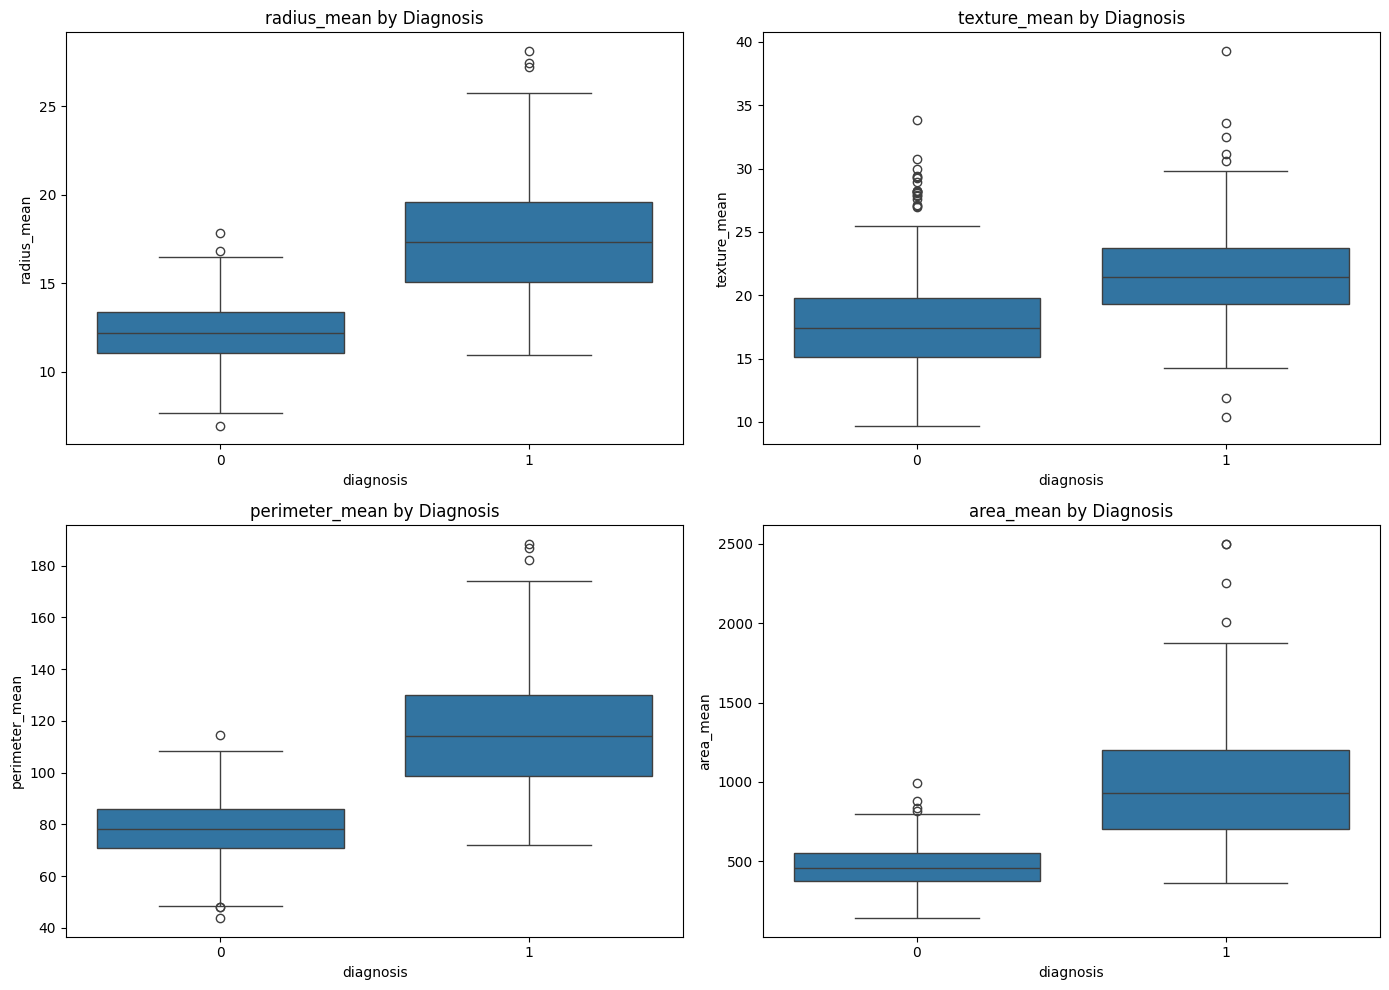

In [ ]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Buat subplot boxplot
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()

# Perbedaan signifikan antara tumor benign dan malignant akan terlihat pada median dan penyebaran data.
# Misalnya, mean radius dan mean perimeter memiliki nilai lebih tinggi untuk tumor ganas.

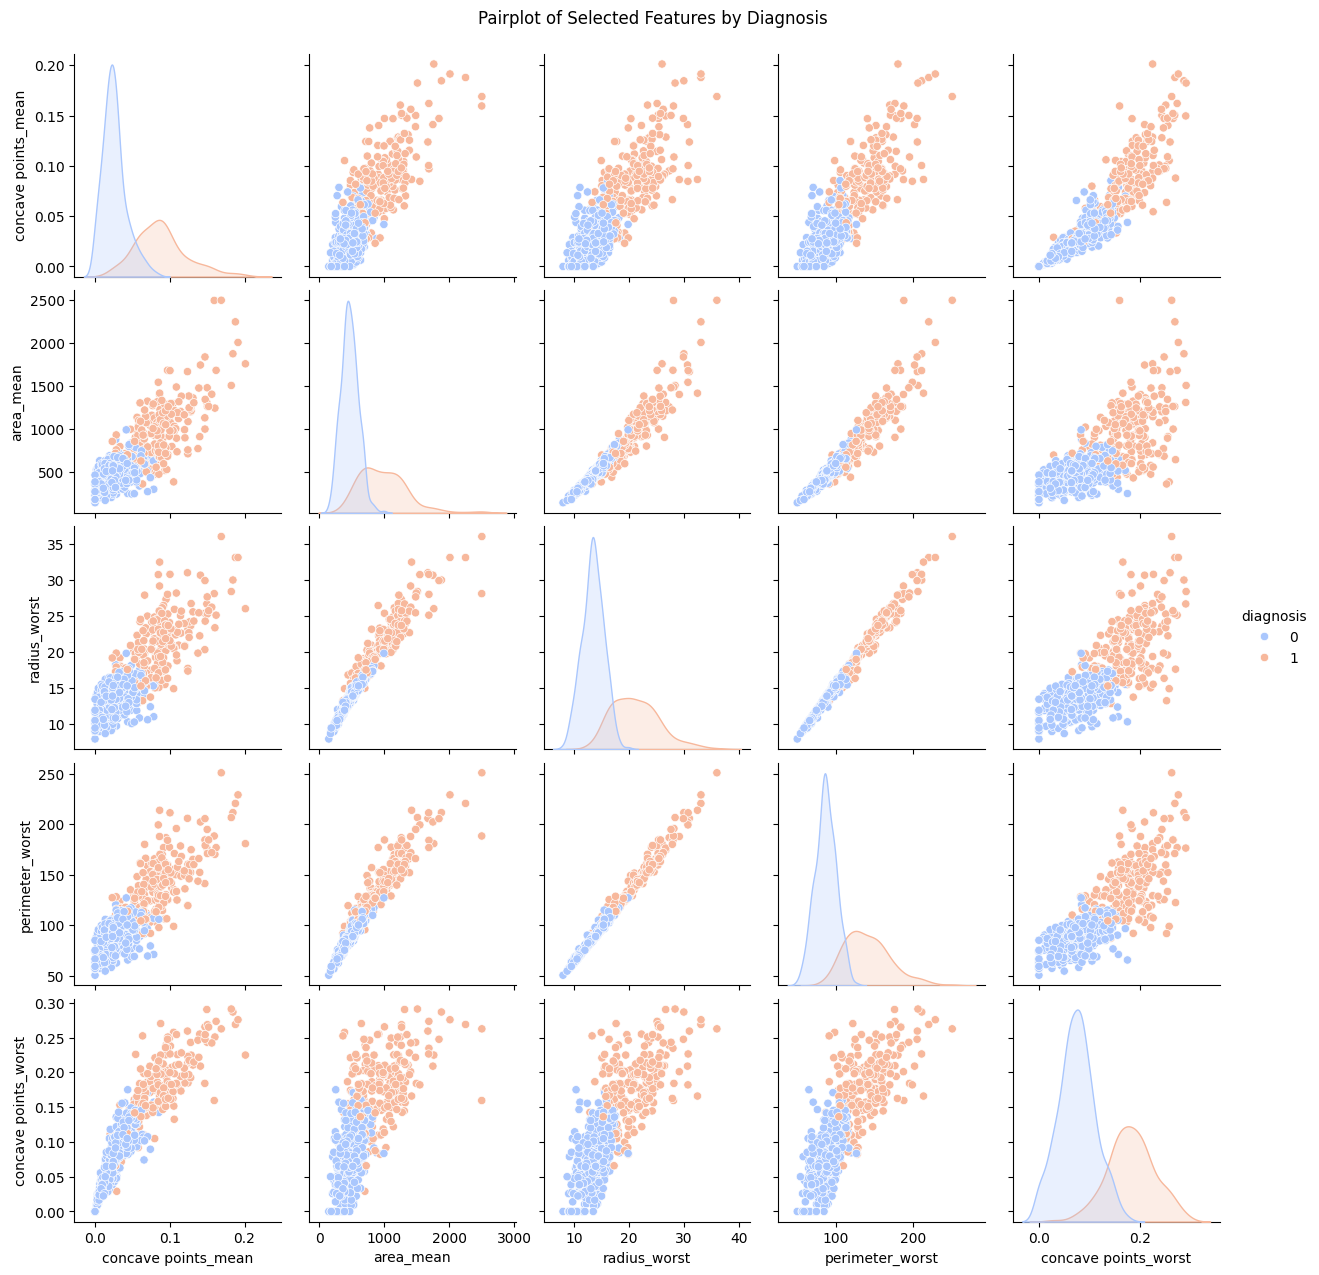

In [ ]:
# Dipilih berdasarkan korelasi tinggi dengan diagnosis.
features = ['concave points_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']

sns.pairplot(df, vars=features, hue="diagnosis", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

Pair plot ini menggambarkan hubungan antar fitur terpilih dari dataset kanker payudara, yang dipisahkan berdasarkan kategori diagnosis (0 untuk jinak dan 1 untuk ganas). Setiap subplot menunjukkan hubungan pasangan fitur, membantu menggambarkan pemisahan antara kasus jinak dan ganas berdasarkan karakteristik ini. Sebagai contoh, fitur seperti `area_mean`, `radius_worst`, `perimeter_worst`, dan `concave points_mean` menunjukkan klaster yang cukup berbeda, di mana kasus ganas (titik oranye) umumnya memiliki nilai yang lebih tinggi dibandingkan kasus jinak (titik biru). Hal ini menunjukkan bahwa tumor yang didiagnosis sebagai ganas cenderung memiliki ukuran yang lebih besar, seperti yang terlihat pada fitur area, radius, dan perimeter. Selain itu, plot pada diagonal menunjukkan distribusi setiap fitur secara individual, di mana kasus ganas cenderung memiliki nilai yang lebih tinggi di banyak fitur, terutama pada `concave points_mean` dan `concave points_worst`, yang menunjukkan bentuk tumor yang lebih tidak beraturan. Pemisahan yang jelas pada fitur-fitur ini mengindikasikan bahwa fitur-fitur tersebut bermanfaat untuk membedakan antara tumor jinak dan ganas, sehingga berpotensi membantu dalam pengembangan model prediktif untuk diagnosis kanker payudara berdasarkan fitur-fitur ini.


## Machine Learning

In [ ]:
#1 Memecah variabel independen dan variabel target, X untuk kolom dengan variabel independen sedangkan Y untuk kolom variabel target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
#2 Memecah data untuk testing dan juga training. Untuk testing sebanyak 20% dan untuk training sebanyak 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#3 Memperlihatkan jumlah baris dan kolom yang ada dalam test dan train
# 267 baris dalam train, 67 baris dalam test
X_train.shape, X_test.shape

((455, 31), (114, 31))

### Decision Tree Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)
dt_gini.fit(X_train, y_train)
# Membuat model decision tree dengan kriteria yang didasarkan pada gini untuk menghitung impurity, random state digunakan untuk hasil nilai acak yang sama setiap mengambil data
# Melatih model decision tree menggunakan x-train dan y-train

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred_gini = dt_gini.predict(X_test)
# Variabel y_pred_gini akan berisi hasil prediksi dari data uji X_test, yang dapat digunakan untuk membandingkan hasil prediksi dengan label asli (y_test) dan menilai kinerja model.

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Mengukur seberapa akurat sebuah model.

Model accuracy score with criterion gini: 0.9385964912280702


In [ ]:
train_score = dt_gini.score(X_train, y_train) # Menghitung akurasi pada data train. Nilai ini menunjukkan seberapa baik model dapat memprediksi label dari data yang sama digunakan saat pelatihan.
test_score = dt_gini.score(X_test, y_test) # Menghitung akurasi model pada data uji. Ini memberikan gambaran tentang seberapa baik model dapat memprediksi label dari data yang tidak terlihat sebelumnya.
print("Training set score:", train_score)
print("Test set score:", test_score)
# Training score 0.99 artinya model dapat berhasil memprediksi data sebanyak 99%. Model ini sudah cukup baik
# Test score 0.95 artinya model dapat berhasil memprediksi data sebanyak 95%. Model ini sudah cukup baik

Training set score: 0.9956043956043956
Test set score: 0.9385964912280702


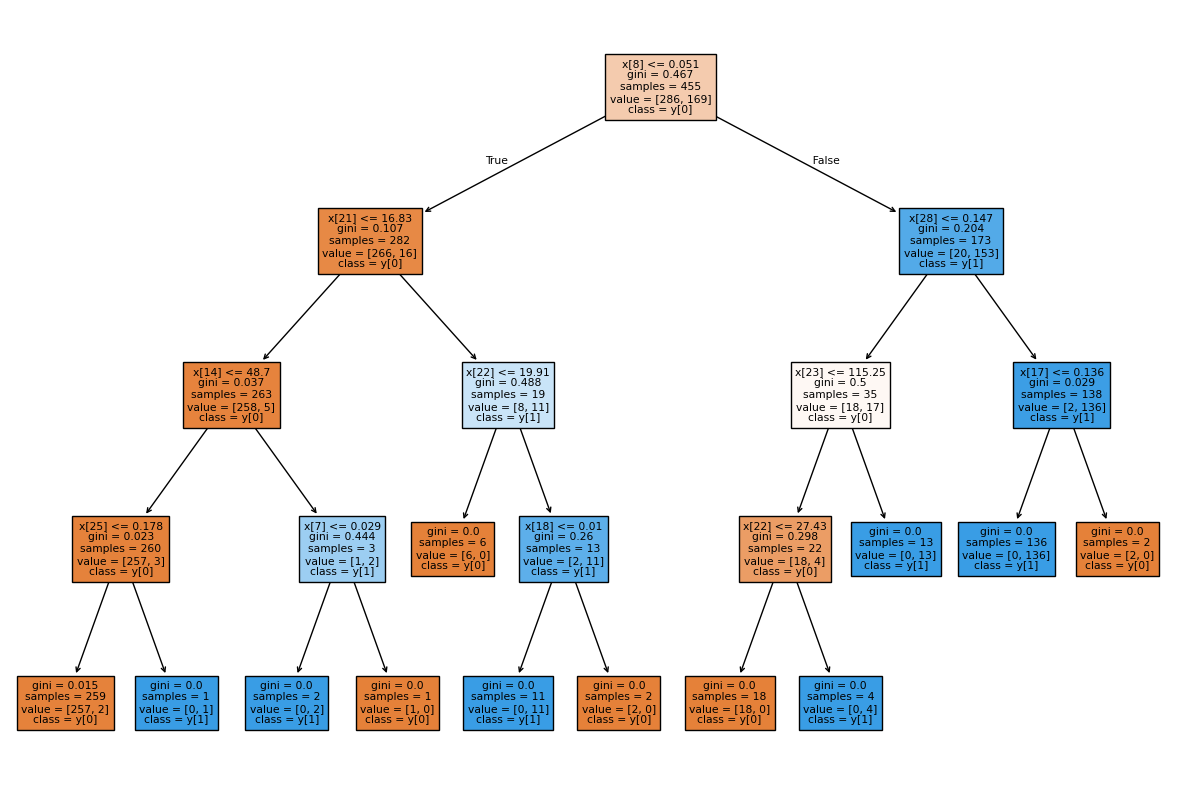

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True, class_names=True)
plt.show()

Setiap node dalam pohon memiliki beberapa atribut penting:

Misalnya, node pertama memiliki x[8] <= 0.051, yang menunjukkan bahwa pengambilan keputusan pertama berdasarkan fitur ke-8. Jika nilai fitur ini kurang dari atau sama dengan 0.051, kita bergerak ke cabang kiri (True), dan jika tidak, ke cabang kanan (False).

Setiap node memiliki nilai "gini," yang menunjukkan ketidakmurnian dari pembagian data di node tersebut. Semakin rendah nilai gini, semakin homogen data di node itu (semakin baik node itu dalam memisahkan kelas). Nilai gini 0, seperti yang terlihat pada beberapa node di bagian bawah, berarti semua sampel dalam node itu memiliki kelas yang sama.

Kolom "samples" menunjukkan berapa banyak sampel yang ada di node itu setelah pembagian dari node sebelumnya. Misalnya, di root node (node pertama), terdapat 455 sampel.

Kolom "value" menunjukkan distribusi kelas di setiap node. Sebagai contoh, pada root node, ada 286 sampel kelas 0 (jinak) dan 169 sampel kelas 1 (ganas).

Setiap node juga memiliki "class," yaitu prediksi kelas berdasarkan mayoritas kelas di node tersebut. Di node pertama, kelas mayoritas adalah y[0], yang berarti lebih banyak sampel jinak.

In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion matrix with criterion gini:")
print(cm_gini)


Confusion matrix with criterion gini:
[[68  3]
 [ 4 39]]


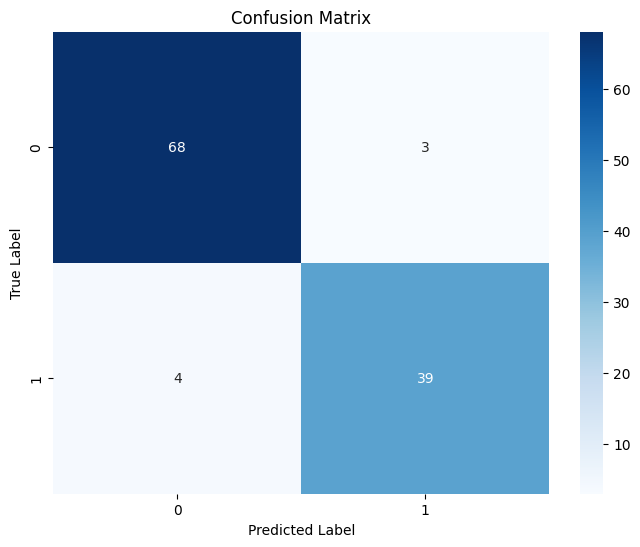

In [ ]:
# Plotting the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TN (True Negatives): 68 - Kasus negatif yang diprediksi dengan benar.

FP (False Positives): 3 - Kasus negatif yang diprediksi sebagai positif.

FN (False Negatives): 4 - Kasus positif yang diprediksi sebagai negatif.

TP (True Positives): 39 - Kasus positif yang diprediksi dengan benar.

In [ ]:
cr_gini = classification_report(y_test, y_pred_gini)
print("\nClassification report with criterion gini:\n", cr_gini)


Classification report with criterion gini:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Classification report di atas memberikan gambaran komprehensif mengenai performa model klasifikasi yang menggunakan kriteria gini. Dalam laporan tersebut, metrik evaluasi yang disajikan mencakup *precision*, *recall*, dan *f1-score* untuk masing-masing kelas, yaitu kelas 0 (negatif) dan kelas 1 (positif). Precision untuk kelas 0 adalah 0.94, yang berarti bahwa dari semua prediksi kelas 0, 94% adalah benar. Recall untuk kelas 0 adalah 0.96, menunjukkan bahwa model berhasil mengidentifikasi 96% dari seluruh kasus positif yang sebenarnya. Untuk kelas 1, precision adalah 0.93 dan recall 0.91, menunjukkan bahwa model cukup efektif dalam mengidentifikasi kasus positif meskipun ada sedikit penurunan dibandingkan dengan kelas 0. F1-score, yang merupakan rata-rata harmonis dari precision dan recall, menunjukkan nilai 0.95 untuk kelas 0 dan 0.92 untuk kelas 1, menunjukkan keseimbangan yang baik antara kedua metrik tersebut. Akurasi keseluruhan model mencapai 0.94, menunjukkan bahwa model ini berhasil mengklasifikasikan 94% dari semua kasus dengan benar. Rata-rata makro dan rata-rata berbobot juga menunjukkan nilai 0.94, mencerminkan kinerja yang konsisten di seluruh kelas.

In [ ]:
print("Model accuracy score with criterion gini:", accuracy_gini)

Model accuracy score with criterion gini: 0.9385964912280702


## Logistic Regression

In [ ]:
scaler = MinMaxScaler() # Membuat objek MinMaxScaler dari pustaka sklearn.preprocessing. Skaler ini akan digunakan untuk mengubah fitur input (X) ke dalam rentang [0, 1].
X = scaler.fit_transform(X) # Menerapkan fit_transform pada data fitur X.

In [ ]:
logreg = LogisticRegression(max_iter=200) # Membuat model dengan max iter 200
logreg.fit(X_train, y_train) # Melakukan pelatihan pada model

LogisticRegression(max_iter=200)

In [ ]:
y_pred_logreg = logreg.predict(X_test) # Menggunakan model yang telah dilatih untuk memprediksi kelas dari data uji X_test. Hasil prediksi disimpan dalam variabel y_pred_logreg.

In [ ]:
predictions = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, predictions)
print("Model accuracy score with Logistic: " , accuracy_log)
# model regresi logistik dapat memprediksi kelas dengan benar sebanyak 95.6% dari semua kasus pada dataset pengujian.

Model accuracy score with Logistic:  0.956140350877193


In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic regression):")
print(conf_matrix_log)

Confusion Matrix (Logistic regression):
[[70  1]
 [ 4 39]]


True Positives (TP): 39 (benar positif)

True Negatives (TN): 70 (benar negatif)

False Positives (FP): 1 (salah positif)

False Negatives (FN): 4 (salah negatif)

In [ ]:
class_report_log = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(class_report_log)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Klasifikasi Kelas 0 (Negatif)

Precision: 0.95

Precision adalah rasio benar positif (TP) terhadap total prediksi positif (TP + FP). Dalam konteks ini, model memiliki precision sebesar 95% untuk kelas 0, yang berarti bahwa dari semua pasien yang diprediksi tidak memiliki kanker, 95% di antaranya memang tidak memiliki kanker.
Recall: 0.99

Recall adalah rasio benar positif (TP) terhadap total aktual positif (TP + FN). Untuk kelas 0, recall sebesar 99% menunjukkan bahwa model sangat baik dalam mengenali pasien yang benar-benar tidak memiliki kanker. Hanya 1% dari pasien yang sebenarnya tidak memiliki kanker yang salah diklasifikasikan.
F1-Score: 0.97

F1-score adalah rata-rata harmonis antara precision dan recall, memberikan gambaran yang lebih seimbang antara kedua metrik tersebut. F1-score 0.97 menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan pasien kelas 0.
Support: 71

Support menunjukkan jumlah aktual dari setiap kelas dalam dataset pengujian. Dalam hal ini, terdapat 71 pasien yang sebenarnya tidak memiliki kanker.
Klasifikasi Kelas 1 (Positif)
Precision: 0.97

Untuk kelas 1, precision 97% berarti bahwa dari semua pasien yang diprediksi memiliki kanker, 97% di antaranya memang benar-benar memiliki kanker. Ini menunjukkan model sangat akurat dalam mengidentifikasi pasien positif.
Recall: 0.91

Recall 91% untuk kelas 1 menunjukkan bahwa model dapat menangkap 91% dari pasien yang benar-benar memiliki kanker. Namun, ada 9% dari pasien yang memiliki kanker tetapi tidak terdeteksi (false negatives).
F1-Score: 0.94

F1-score untuk kelas 1 adalah 0.94, menunjukkan bahwa model juga memiliki performa yang baik dalam mengklasifikasikan pasien positif, meskipun ada sedikit penurunan dibandingkan dengan kelas 0.
Support: 43

Support menunjukkan jumlah aktual dari kelas 1, dengan 43 pasien yang benar-benar memiliki kanker dalam dataset pengujian.
Ringkasan Keseluruhan
Accuracy: 0.96

Akurasi keseluruhan model adalah 96%, yang menunjukkan bahwa model secara umum dapat memprediksi dengan baik pada dataset pengujian.
Macro Average:

Precision: 0.96, Recall: 0.95, F1-Score: 0.95
Ini adalah rata-rata dari precision, recall, dan F1-score untuk semua kelas, tanpa mempertimbangkan proporsi setiap kelas. Ini memberikan pandangan yang adil tentang kinerja model di seluruh kelas.
Weighted Average:

Precision: 0.96, Recall: 0.96, F1-Score: 0.96
Rata-rata ini memperhitungkan jumlah support dari setiap kelas, memberikan gambaran yang lebih baik tentang performa model secara keseluruhan, terutama saat ada ketidakseimbangan kelas.

## K-Nearest Neighbor

In [ ]:

# Make the classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred_knn = classifier.predict(X_test)
# Displaying the classification report
report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
print('\nClassification Report using K Nearest Neighbour:')
print(report_knn)

# Identifying TP, TN, FP, and FN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix using K Nearest Neighbour\n", cm_knn)

# Display the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy Score using K Nearest Neighbour: ", accuracy_knn)


Classification Report using K Nearest Neighbour:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114

Confusion Matrix using K Nearest Neighbour
 [[63  8]
 [20 23]]

Accuracy Score using K Nearest Neighbour:  0.7543859649122807


Kelas 0 (Negatif):

- Precision: 0.76 — Dari semua prediksi negatif, 76% benar-benar tidak memiliki kanker.
- Recall: 0.89 — Dari semua pasien yang tidak memiliki kanker, 89% berhasil teridentifikasi dengan benar oleh model.
- F1-Score: 0.82 — Metrik ini mengindikasikan keseimbangan antara precision dan recall, menunjukkan performa yang baik.

Kelas 1 (Positif):

- Precision: 0.74 — Dari semua prediksi positif, 74% benar-benar memiliki kanker.
- Recall: 0.53 — Model hanya berhasil mengidentifikasi 53% dari pasien yang benar-benar memiliki kanker, menunjukkan ada 47% pasien positif yang tidak terdeteksi (false negatives).
- F1-Score: 0.62 — Menunjukkan performa yang lebih rendah dibandingkan kelas 0.
Akurasi: 0.75 — Model KNN memiliki akurasi 75%, artinya 75% dari semua prediksi benar.

Macro Average:

- Precision: 0.75, Recall: 0.71, F1-Score: 0.72 — Rata-rata dari semua kelas, tanpa memperhitungkan jumlah masing-masing kelas, menunjukkan performa keseluruhan model.

Weighted Average:

Precision: 0.75, Recall: 0.75, F1-Score: 0.74 — Rata-rata yang memperhitungkan support, memberikan gambaran kinerja model di seluruh dataset.

True Negatives (TN): 63 — Pasien yang benar-benar tidak memiliki kanker dan terprediksi tidak memiliki kanker.

False Positives (FP): 8 — Pasien yang tidak memiliki kanker tetapi diprediksi memiliki kanker.

False Negatives (FN): 20 — Pasien yang sebenarnya memiliki kanker tetapi terprediksi tidak memilikinya.

True Positives (TP): 23 — Pasien yang benar-benar memiliki kanker dan terprediksi positif.

Model KNN memiliki akurasi yang baik di angka 75%, tetapi menunjukkan performa yang kurang baik dalam mendeteksi pasien positif (kelas 1), dengan recall hanya 53%. Hal ini menunjukkan bahwa ada potensi untuk meningkatkan model agar lebih efektif dalam mengidentifikasi pasien dengan kanker.